In [41]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import keras

%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
print("Amount images in training set {}".format(x_train.shape))
print("Amount labels in training set {}".format(y_train.shape))
print("Amount images in test set {}".format(x_test.shape))
print("Amount labels in test set {}".format(y_train.shape))

Amount images in training set (60000, 28, 28)
Amount labels in training set (60000,)
Amount images in test set (10000, 28, 28)
Amount labels in test set (60000,)


In [4]:
class_names = ['Футболка', 'Брюки', 'Пуловер', 'Плаття', 'Пальто',
               'Босоніжка', 'Сорочка', 'Кросівка', 'Сумка', 'Черевик']

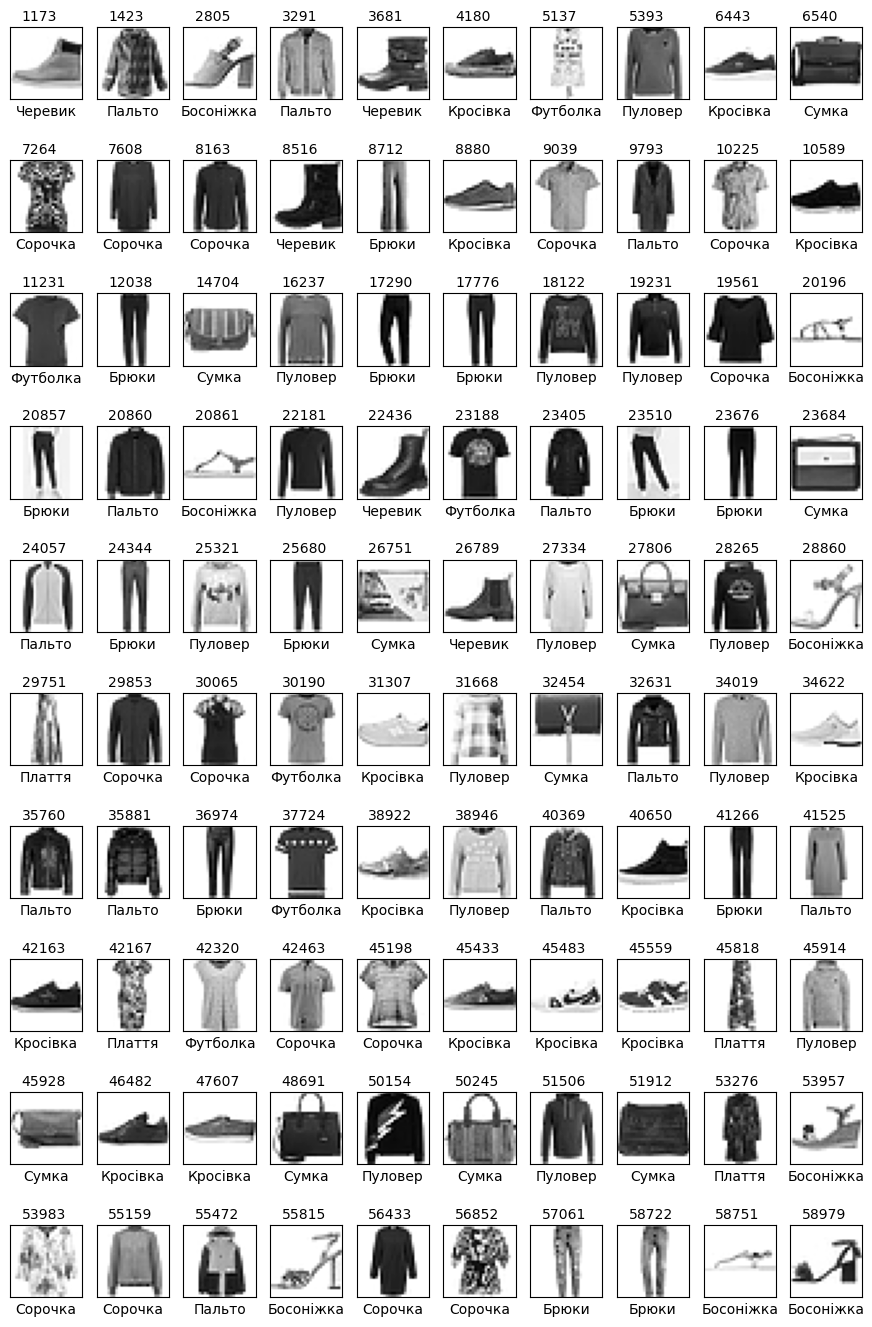

In [5]:
plt.figure(figsize=(11,17))
i = 0
for ind in np.sort(np.random.randint(0, x_train.shape[0], size=100, dtype=int)):
    i += 1
    plt.subplot(10,10,i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[ind], cmap='binary')
    plt.xlabel(class_names[y_train[ind]])
    plt.text(x=4, y=-3, s=ind)
plt.show()

In [6]:
# Images should first have normalized by rescaling pixels to the [0, 1] 
x_train, x_test = tf.cast(x_train/255.0, tf.float32), tf.cast(x_test/255.0, tf.float32)

2023-10-23 11:21:01.384533: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [7]:
model = tf.keras.models.Sequential()

In [8]:
model.add(tf.keras.layers.Flatten())

# model.add(tf.keras.layers.Dense(256, activation="relu"))
# model.add(tf.keras.layers.Dense(128, activation="relu"))

model.add(tf.keras.layers.Dense(512, activation="relu"))
model.add(tf.keras.layers.Dense(392, activation="softplus"))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(32, activation="softplus"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.build(input_shape=[None, 28, 28])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 392)               201096    
                                                                 
 dense_2 (Dense)             (None, 64)                25152     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 630,578
Trainable params: 630,578
Non-trai

In [9]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(x_train, y_train, batch_size=32, epochs=150)

Epoch 1/77
1875/1875 [==============================] - 34s 17ms/step - loss: 0.8634 - accuracy: 0.7010
Epoch 2/77
1875/1875 [==============================] - 35s 19ms/step - loss: 0.5206 - accuracy: 0.8129
Epoch 3/77
1875/1875 [==============================] - 36s 19ms/step - loss: 0.4591 - accuracy: 0.8346
Epoch 4/77
1875/1875 [==============================] - 41s 22ms/step - loss: 0.4236 - accuracy: 0.8468
Epoch 5/77
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4003 - accuracy: 0.8548
Epoch 6/77
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3812 - accuracy: 0.8622
Epoch 7/77
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3663 - accuracy: 0.8660
Epoch 8/77
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3551 - accuracy: 0.8708
Epoch 9/77
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3427 - accuracy: 0.8747
Epoch 10/77
1875/1875 [==============================] - 20s 11m

In [11]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 6s 20ms/step - loss: 0.4229 - accuracy: 0.8916


[0.4229377806186676, 0.8916000127792358]

In [ ]:
probability_model = tf.keras.Sequential([model,  tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)

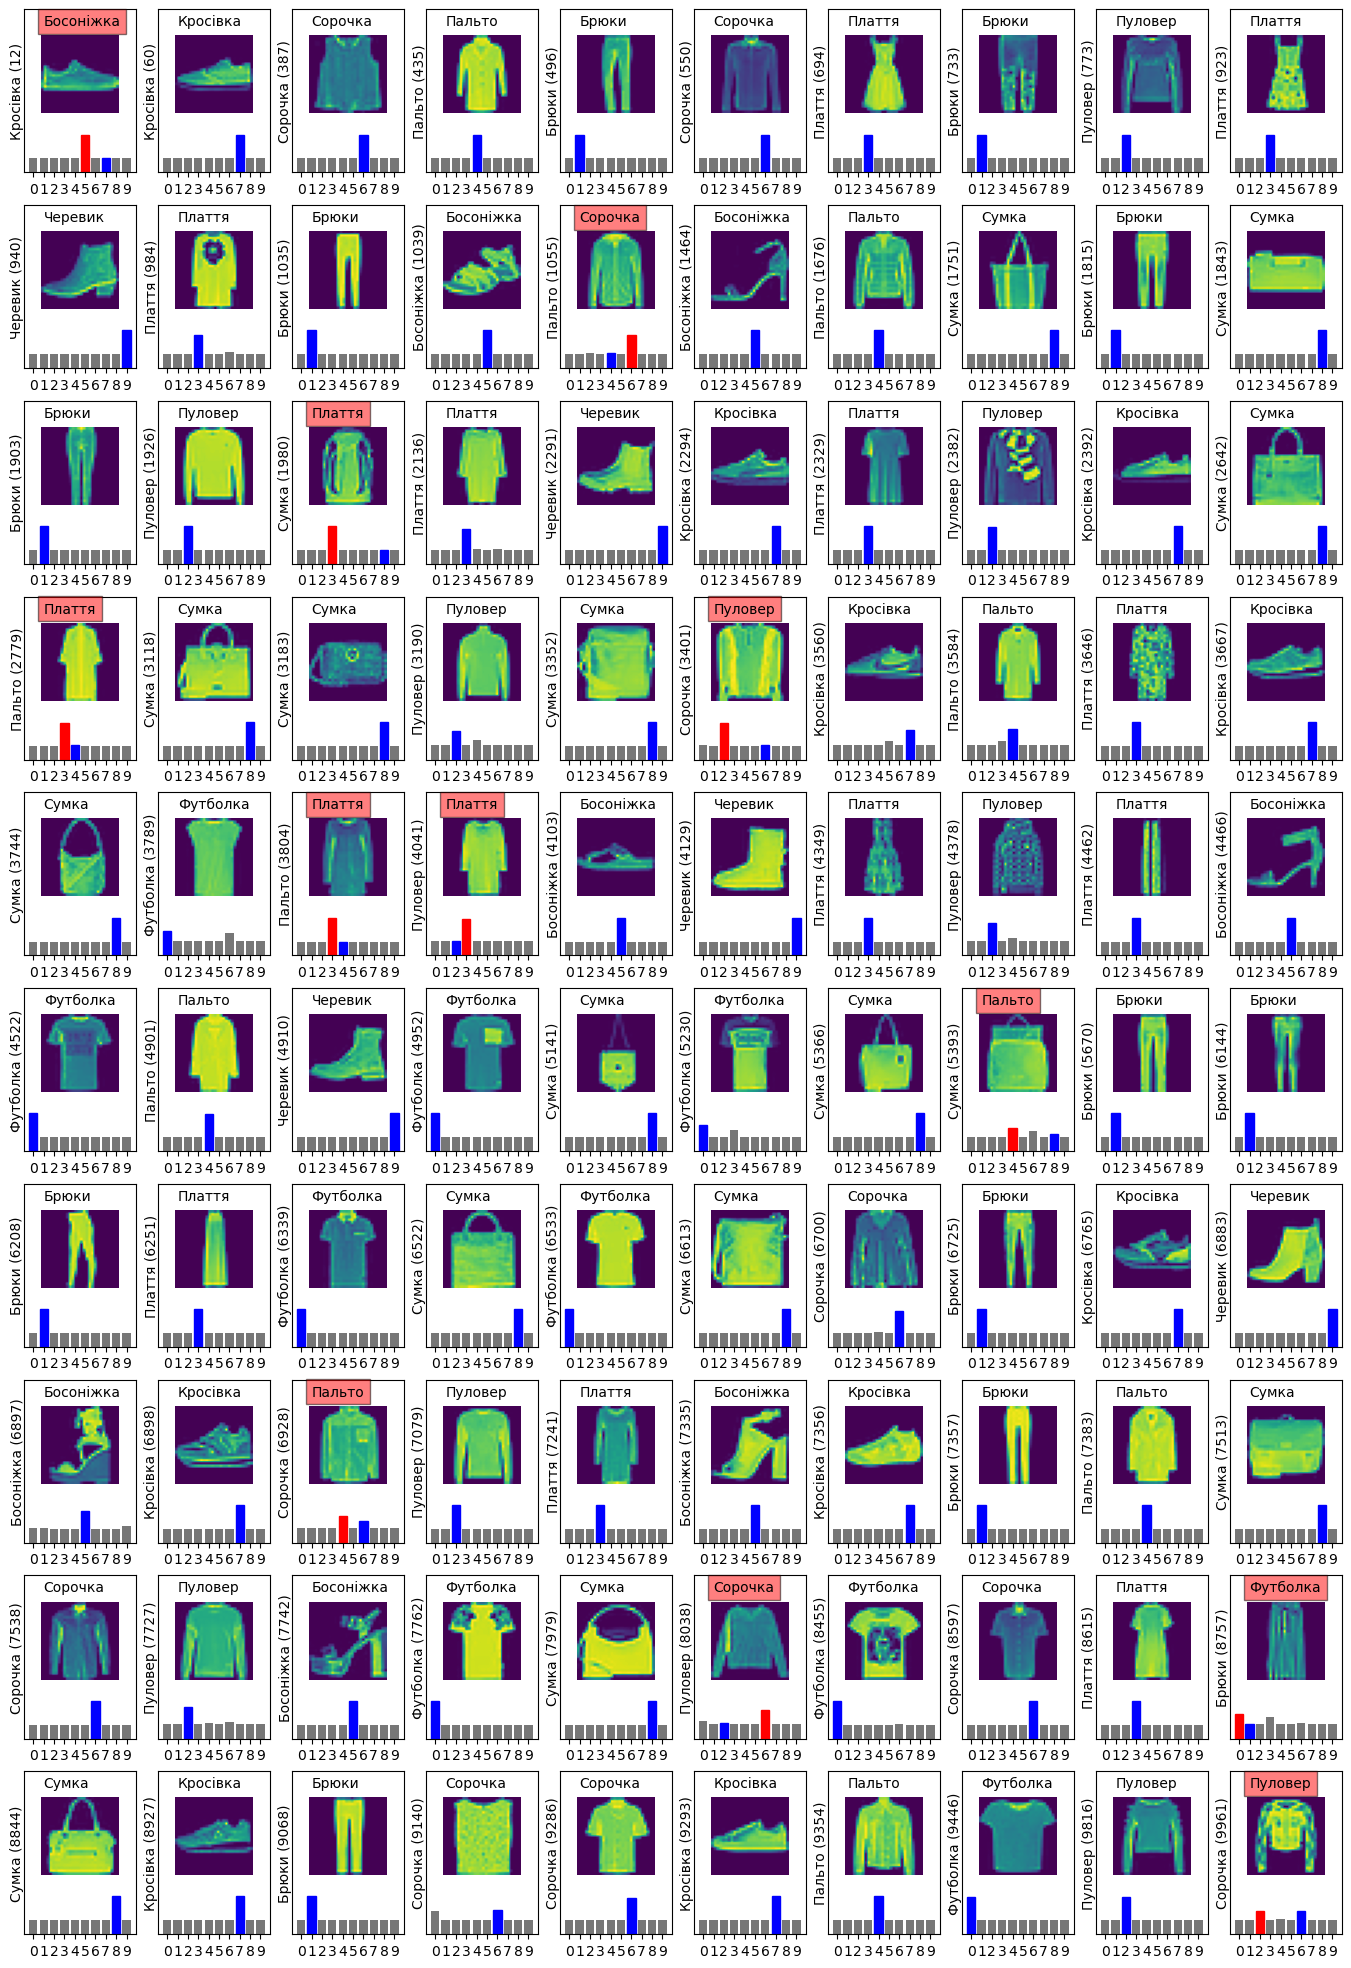

In [70]:
plt.figure(figsize=(17,25))
i = 0
for ind in np.sort(np.random.randint(0, x_test.shape[0], size=100, dtype=int)):
    y_predict_ind = np.argmax(predictions[ind])
    y_predict = class_names[y_predict_ind]
    y_actual_ind = y_test[ind]
    y_actual = class_names[y_actual_ind]
    bbox = None
    if y_actual_ind != y_predict_ind:
        bbox = dict(facecolor='red', alpha=0.5)
    img = x_test[ind]
    # Show image and hist of classification
    i += 1
    fig = plt.subplot(10,10,i)
    imagebox = OffsetImage(img, zoom = 2)
    fig.axes.add_artist(AnnotationBbox(imagebox, (4.5,0.6), frameon = False))
    plt.grid(False)
    plt.xticks(range(len(class_names)))
    plt.yticks([])
    thisplot = plt.bar(range(len(class_names)), predictions[ind], color="#777777", alpha=1)
    plt.ylim([0, 1])
    plt.ylabel(f"{y_actual} ({ind})", labelpad=0)
    thisplot[y_predict_ind].set_color('red')
    thisplot[y_actual_ind].set_color('blue')
    plt.text(x=1, y=0.9, s=y_predict, bbox=bbox)

plt.show()